In [ ]:
# This lab is how digital images are represented and manipulated in a computer

In [4]:
# Step 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 2
def sample_image(image, factor):
    """
    Downsamples the image by the given factor.
    Args:
    image (numpy array): Original image.
    factor (int): Factor by which to downsample.
    Returns:
    numpy array: Downsampled image.
    """
    height, width = image.shape[:2]
    sampled_image = cv2.resize(image, (width // factor, height
    // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image

def quantize_image(image, levels):
    """
    Reduces the number of grayscale levels in the image.
    Args:
    image (numpy array): Original image.
    levels (int): Number of grayscale levels.
    Returns:
    numpy array: Quantized image.
    """
    quantized_image = np.floor(image / (256 // levels)) * (256
    // levels)
    quantized_image = quantized_image.astype(np.uint8)
    return quantized_image

def plot_images(original, sampled, quantized):
    """
    Plots the original, sampled, and quantized images side by
    side.
    Args:
    original (numpy array): Original image.
    sampled (numpy array): Sampled image.
    quantized (numpy array): Quantized image.
    """
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image')
    plt.axis('off')
    plt.show()

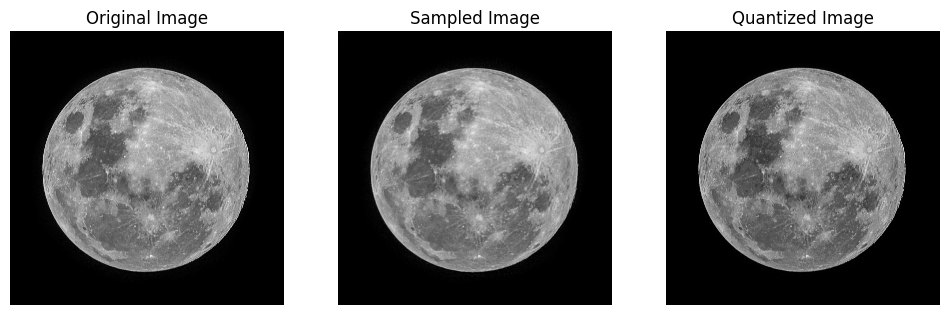

In [12]:
# Step 3
image_path= r"Pics\Grayscale_Moon.jpg"
sampling_factor=14
quantization_levels=9
# Load image in grayscale
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if original_image is None:
    print(f"Error: Unable to load image at {image_path}")
# Sample and quantize
sampled_image = sample_image(original_image, sampling_factor)

quantized_image = quantize_image(original_image,quantization_levels)
# Plot results
plot_images(original_image, sampled_image, quantized_image)

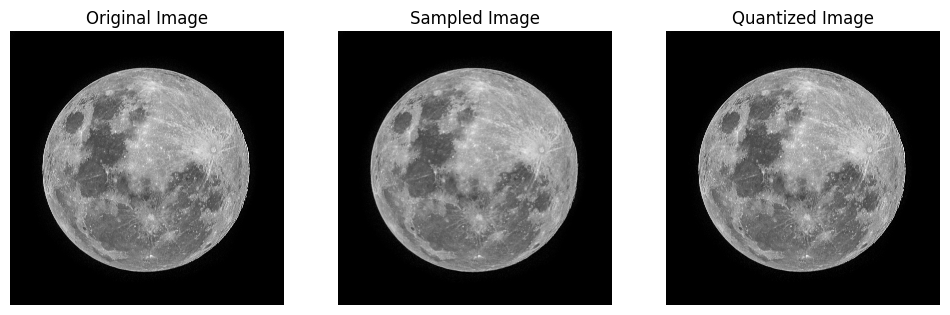

In [13]:
# Task 1
def task1(image, sampling_factor=12, quantization_levels=60):
    sampled = sample_image(image, sampling_factor)
    quantized = quantize_image(image, quantization_levels)
    plot_images(image, sampled, quantized)
    return sampled, quantized

sampled_image, quantized_image = task1(original_image)

In [15]:
# Task 2 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def plot_image(image, title='Image', figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def load_resize(path, size=(400, 400)):
    return np.asarray(Image.open(path).resize(size, Image.Resampling.LANCZOS))

im1arr = load_resize(r"Pics\Grayscale_Cat.jpg")
im2arr = load_resize(r"Pics\Grayscale_Doggy.jpg")

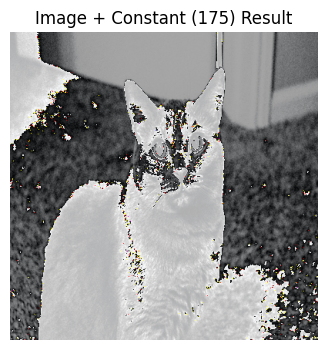

In [17]:
# Task 2.2
addition_constant = np.clip(im1arr + 175, 0, 255)
resultImage = Image.fromarray(addition_constant.astype(np.uint8))
plot_image(resultImage, "Image + Constant (175) Result")

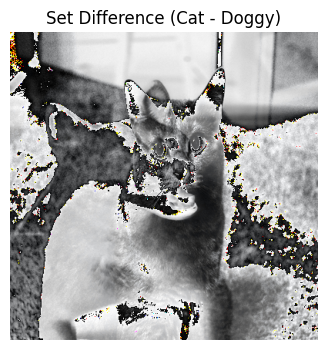

In [18]:
# Task 2.3
set_difference = np.clip(im1arr - im2arr, 0, 255)
resultImage = Image.fromarray(set_difference.astype(np.uint8))
plot_image(resultImage, 'Set Difference (Cat - Doggy)')

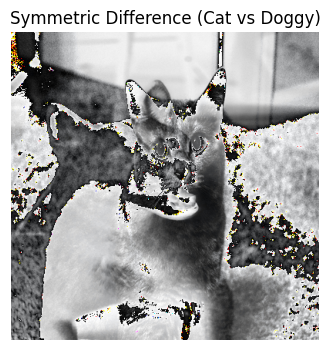

In [19]:
# Task 2.4
symmetric_difference = np.abs(im1arr - im2arr)
resultImage = Image.fromarray(symmetric_difference.astype(np.uint8))
plot_image(resultImage, 'Symmetric Difference (Cat vs Doggy)')

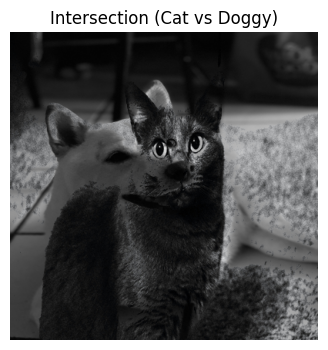

In [20]:
# Task 2.5
intersection = np.minimum(im1arr, im2arr)
resultImage = Image.fromarray(intersection.astype(np.uint8))
plot_image(resultImage, 'Intersection (Cat vs Doggy)')